In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('scp_data.csv')  # 디폴트 구분자는 comma
data.head()

,X0,X1
0,-6.810625,-0.060347
1,-0.303414,-2.979659
2,-7.891267,-11.736160
3,4.327531,2.606615
4,-9.171777,-6.358040


In [3]:
# 컬럼 rename
data = data.rename(columns={'X0':'X'})
data = data.rename(columns={'X1':'Y'})
data

,X,Y
0,-6.810625,-0.060347
1,-0.303414,-2.979659
2,-7.891267,-11.736160
3,4.327531,2.606615
4,-9.171777,-6.358040
...,...,...
495,6.167753,11.217280
496,3.306280,-7.856879
497,-4.374134,-7.369407
498,-8.664096,-5.931189


Text(0.5, 1.0, 'Location')

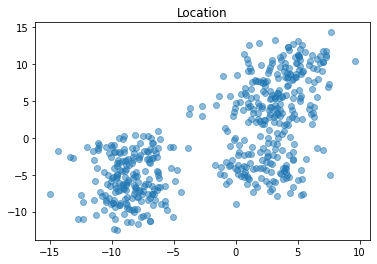

In [4]:
# 시각화
plt.scatter(data['X'],data['Y'], alpha=0.5)
plt.title('Location')

### 하나의 인덱싱 => 한 점의 좌표 추출

In [5]:
data.values[0] # 0행의 점, x좌표: -6.81xx, y좌표: -0.0603xxx

array([-6.8106249 , -0.06034676])

In [6]:
# 유클리드 거리 계산 메서드
def lengthCheck(ax, ay, bx, by, radius):
    _len = math.sqrt((ax-bx)**2 + (ay-by)**2) 
    if _len <= radius:
        return True
    else:
        return False

In [7]:
# 각 점을 중심점 삼아 'radius'길이의 반지름을 갖는 원을 생성한다. 
# 생성된 원은 _circle 리스트에 전달(각 원은 리스트 형태이고, 원 안의 점들(인덱스)이 포함된다.)
def makeCircle(ax, ay, data, radius):
    _info = []
    _info.append([ax, ay])
    _circle = []
    
    for idx in range(data['X'].size):
        bx = data.values[idx][0]
        by = data.values[idx][1]
        
        if(lengthCheck(ax, ay, bx, by, radius)):
            #if ax == bx and ay == by:  # 중심점 제외
            #    continue
            _circle.append(idx)
           
    _info.append(_circle)
    
    return _info, len(_circle) # 원 안의 요소들 집합과 원의 사이즈 리턴

In [8]:
# 테스트
# 0행의 좌표를 중심점으로 삼고, 반지름이 3인 원 안의 점들(list)
_circle, _circleSize = makeCircle(data.values[0][0], data.values[0][1], data, 3)
print(_circle)      # _circle[0]
print(_circleSize)

[[-6.810624895025087, -0.0603467571512772], [0, 7, 8, 22, 36, 48, 50, 54, 59, 80, 95, 102, 120, 136, 140, 169, 181, 216, 224, 253, 256, 263, 277, 291, 307, 327, 333, 346, 371, 396, 404, 436, 473, 489]]
34


In [9]:
# 중심점
_circle[0]

[-6.810624895025087, -0.0603467571512772]

In [10]:
# 중심점의 원 안의 점들(데이터 set 인덱스)
_circle[1] # 중심점까지 포함

[0,
 7,
 8,
 22,
 36,
 48,
 50,
 54,
 59,
 80,
 95,
 102,
 120,
 136,
 140,
 169,
 181,
 216,
 224,
 253,
 256,
 263,
 277,
 291,
 307,
 327,
 333,
 346,
 371,
 396,
 404,
 436,
 473,
 489]

In [11]:
def makeTotalCircle(radius):
    totalCircle = []
    totalCircleSize = []
    
    for idx in range(data['X'].size):
        ax = data.values[idx][0]
        ay = data.values[idx][1]
    
        _circle, _circleSize = makeCircle(ax, ay, data, radius)
        totalCircle.append(_circle)
        totalCircleSize.append(_circleSize)
    
    return totalCircle

In [12]:
# 합집합 갱신 
def appendHapZip(totalSelectedPoint, hapZip, selectedPoint):
    totalSelectedPoint.append(selectedPoint[0])
    hapZip += selectedPoint[1]
    
    return totalSelectedPoint, hapZip

In [13]:
# 데이터 갱신(이미 선택된 점들 제거)
def dataRenewal(hapZip, totalCircle):
    newTotalCircle = []
    hapZip = set(hapZip)
    
    for idx in range(500):
        tempSet = set(totalCircle[idx][1])
        
        tempSet = tempSet - hapZip
        tempSet = list(tempSet)
        
        _temp = [] 
        _temp.append(totalCircle[idx][0])
        _temp.append(tempSet)
        
        newTotalCircle.append(_temp)
        
    return newTotalCircle

In [14]:
# 최적의 중심점들을 도출
def processing(totalCircle):
    hapZip = []
    totalSelectedPoint = []
    
    while len(hapZip) < 500:
        # sort
        totalCircle.sort(key = lambda x:len(x[1]), reverse=True)
        
        # 가장 큰 집합 선택
        selectedPoint = totalCircle[0]
        
        # 좌표 append, 합집합 갱신
        totalSelectedPoint, hapZip = appendHapZip(totalSelectedPoint, hapZip, selectedPoint)
        
        # 처음 좌표의 리스트 기준으로 나머지 리스트 갱신
        totalCircle = dataRenewal(hapZip, totalCircle)
        
        
    return totalSelectedPoint

In [15]:
# 모든 점들을 중심점으로 삼는 원 생성, 반지름: 3 
totalCircle = makeTotalCircle(3)

In [16]:
#totalCircle

In [17]:
# 500개의 원 정보
len(totalCircle) 

500

In [18]:
# 위 500개의 원들 중 모든 점을 포함하도록 특정 원을 선택한다. (Greedy 방식)
totalSelectedPoint = processing(totalCircle)

In [19]:
# 아래의 선택된 점들을 중심점으로 삼고 반지름 3인 원들을 그리면 데이터의 모든 점들이 원안에 포함된다. 
totalSelectedPoint

[[-8.010849784678102, -6.850366440142775],
 [2.8216352846256663, 4.136913495172196],
 [2.0097604567262604, -4.058358305114124],
 [4.902193048990444, 10.084446430105672],
 [-8.959881679987339, -1.954042004858892],
 [-10.000137822905046, -10.425973359602867],
 [1.0026573338898048, 10.133946904149616],
 [1.9397566905945585, 0.3143994919246959],
 [6.527121501791579, 5.53929877867766],
 [5.036332198569792, -5.64464495166971],
 [-0.7899674747110494, -6.245615220364826],
 [-1.6090987939367123, 4.448499709873897],
 [-6.632172595724741, -9.08632540183337],
 [-6.605503110707942, -1.6807244277222984],
 [-11.425554452845542, -2.938408825373928],
 [5.67644968682797, -2.877536152890145],
 [5.373740422273478, 12.636983164866734],
 [-12.281305912234052, -8.64686704463743],
 [-5.235974902635094, -4.119357783095237],
 [7.081399420875013, 11.73787445447032],
 [4.39552307717467, 0.0779761327676382],
 [-11.52250263011322, -1.8271859527260117],
 [-0.084620104418859, 4.101145718078247]]

In [20]:
def scatter_circles(selected_point, radius):

    fig, ax_nstd = plt.subplots(figsize=(10, 10))

    plt.scatter(data['X'],data['Y'], s=5, alpha=0.7)
    for c_x, c_y in totalSelectedPoint:
        plt.scatter(c_x, c_y, color = 'k', marker = 'x', s = 10)
        ax_nstd.add_patch(plt.Circle((c_x, c_y), radius, color='g', alpha=0.3))
    plt.show()
    

반지름 길이: 3인 원 생성, 선택된 점 들
[[-8.010849784678102, -6.850366440142775], [2.8216352846256663, 4.136913495172196], [2.0097604567262604, -4.058358305114124], [4.902193048990444, 10.084446430105672], [-8.959881679987339, -1.954042004858892], [-10.000137822905046, -10.425973359602867], [1.0026573338898048, 10.133946904149616], [1.9397566905945585, 0.3143994919246959], [6.527121501791579, 5.53929877867766], [5.036332198569792, -5.64464495166971], [-0.7899674747110494, -6.245615220364826], [-1.6090987939367123, 4.448499709873897], [-6.632172595724741, -9.08632540183337], [-6.605503110707942, -1.6807244277222984], [-11.425554452845542, -2.938408825373928], [5.67644968682797, -2.877536152890145], [5.373740422273478, 12.636983164866734], [-12.281305912234052, -8.64686704463743], [-5.235974902635094, -4.119357783095237], [7.081399420875013, 11.73787445447032], [4.39552307717467, 0.0779761327676382], [-11.52250263011322, -1.8271859527260117], [-0.084620104418859, 4.101145718078247]]


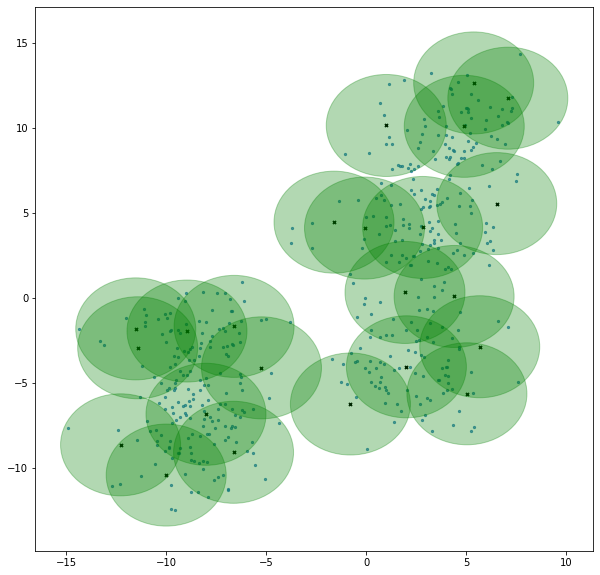

선택된 원의 갯수: 23



반지름 길이: 4인 원 생성, 선택된 점 들
[[-8.649891817491874, -5.684867089597169], [3.165740383205282, 5.711748042179282], [2.0984774944542037, -3.045414935398327], [4.001308305478501, 10.12114638073841], [-7.724620995118288, -2.260328529498752], [-9.348037201622468, -9.103370355946586], [-0.1992083041968242, 2.9539362973503978], [3.8052990001756655, -4.127117181077481], [5.918694178312997, 3.88598259899461], [-11.204814662186571, -4.017641854444116], [-0.7899674747110494, -6.245615220364826], [6.602981449243447, 10.705997433542686], [-0.001013471977969, 4.754303239036092], [-4.374133612391172, -7.369407201012914], [3.7808067926339017, 0.4872714712191257], [-11.443027292551411, -8.376975112070273]]


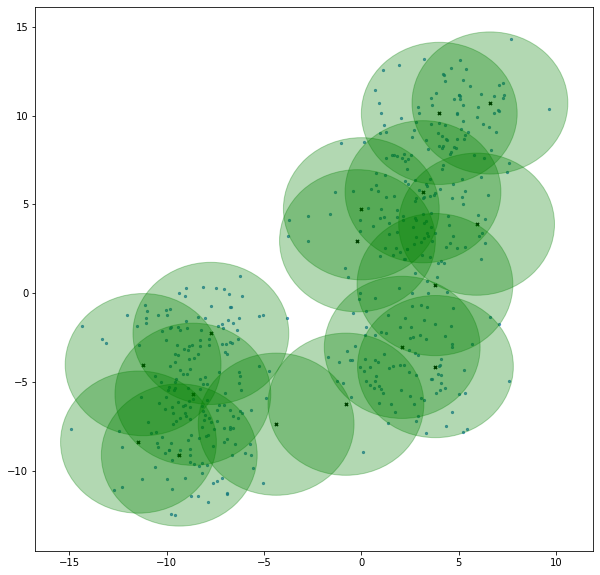

선택된 원의 갯수: 16



반지름 길이: 5인 원 생성, 선택된 점 들
[[-8.91602208298329, -5.347868135164285], [3.5223171812533587, 6.426582421982484], [2.897744974955406, -3.491483417874367], [4.917251278171033, 10.152673083710862], [-5.024548921675733, -1.237577313531451], [-8.91100293834021, -8.270829703585381], [-3.7570471750355576, 3.24391647371145], [-9.430385849198451, -1.9022492572817695], [-11.30548107209206, -5.82391966155109], [1.6431304778145952, 2.132506462191932], [-4.374133612391172, -7.369407201012914]]


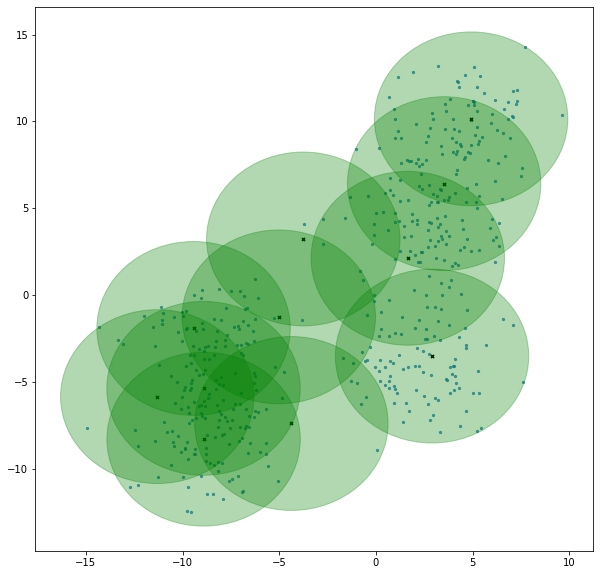

선택된 원의 갯수: 11



반지름 길이: 6인 원 생성, 선택된 점 들
[[-8.291357259315681, -5.4065702702099845], [4.156984938875081, 6.981280909433092], [3.023234524154013, -2.3268315984232046], [-9.067849155431764, -6.752484482383727], [-1.0394727059127409, 8.439241779341462], [5.324969010559277, 8.892585913623419], [-9.56628057717473, -3.872627570095711], [-5.699347225248333, -8.50143570587852]]


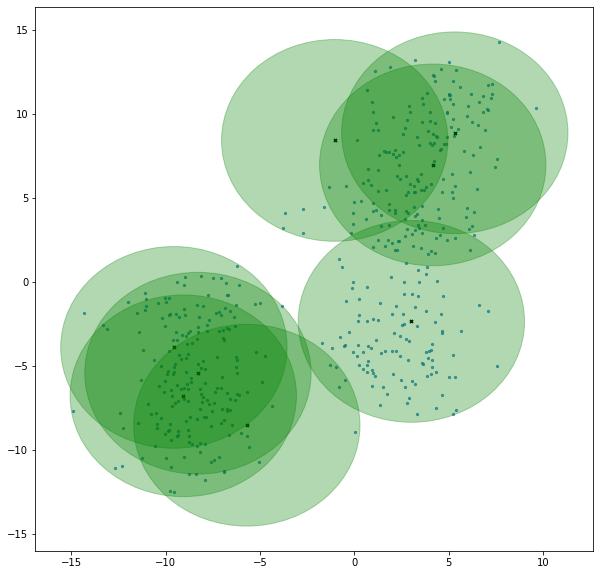

선택된 원의 갯수: 8



반지름 길이: 7인 원 생성, 선택된 점 들
[[-4.742216622359665, -4.393417411837817], [3.385481574169793, 6.034352971817848], [3.1995337184891675, -1.4868422282332667], [-8.649891817491874, -5.684867089597169], [4.2132695425860245, 8.289502639044647], [1.287541126983022, 7.58476789330772]]


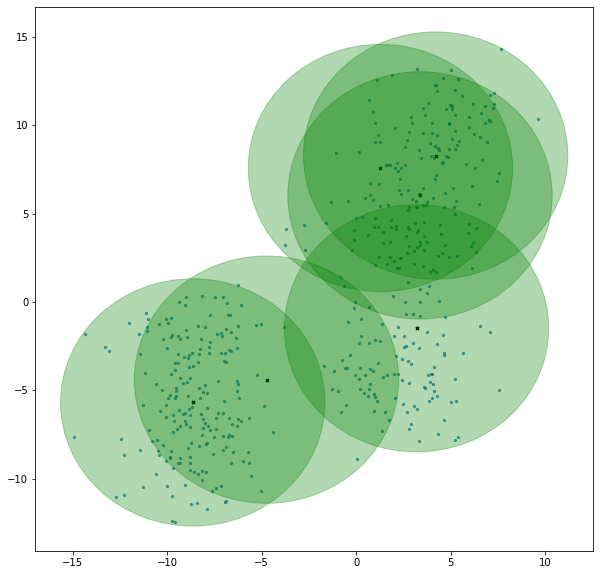

선택된 원의 갯수: 6



반지름 길이: 8인 원 생성, 선택된 점 들
[[-4.742216622359665, -4.393417411837817], [3.712652133197576, 5.504660773057796], [3.0386269719719, -0.6747788445141119], [-8.006500575219818, -4.687642144311902], [6.144621941237983, 6.564726480823736]]


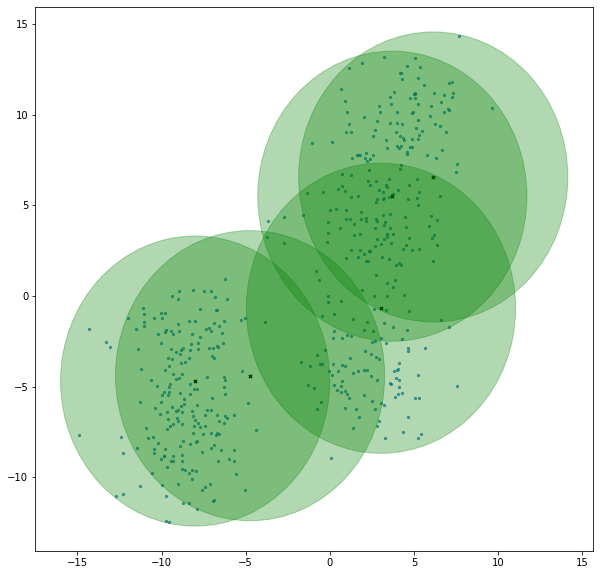

선택된 원의 갯수: 5



반지름 길이: 9인 원 생성, 선택된 점 들
[[-1.6977392907099835, -3.612336974545712], [5.31157489544071, 5.734659835725013], [-7.286683221969059, -4.445207896870691], [-0.7899674747110494, -6.245615220364826]]


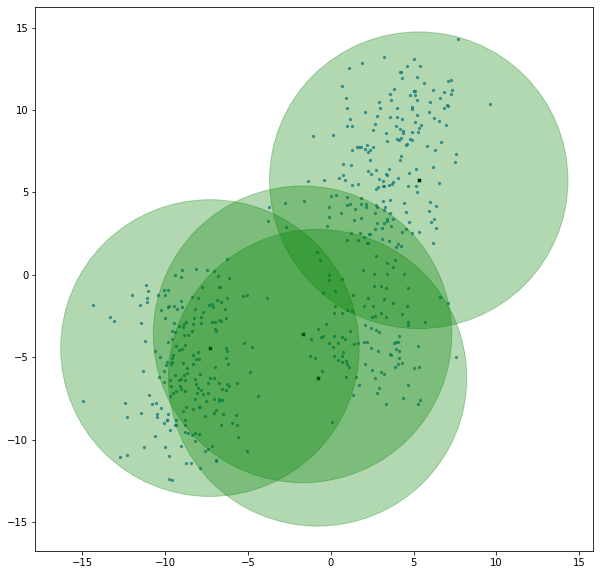

선택된 원의 갯수: 4



반지름 길이: 10인 원 생성, 선택된 점 들
[[-3.8297750856743855, -1.4060796338623591], [3.368497270652417, 3.414073322753163], [-4.374133612391172, -7.369407201012914], [-5.679421519533346, -6.547652352063274], [3.2132126722484715, 5.397121372512781]]


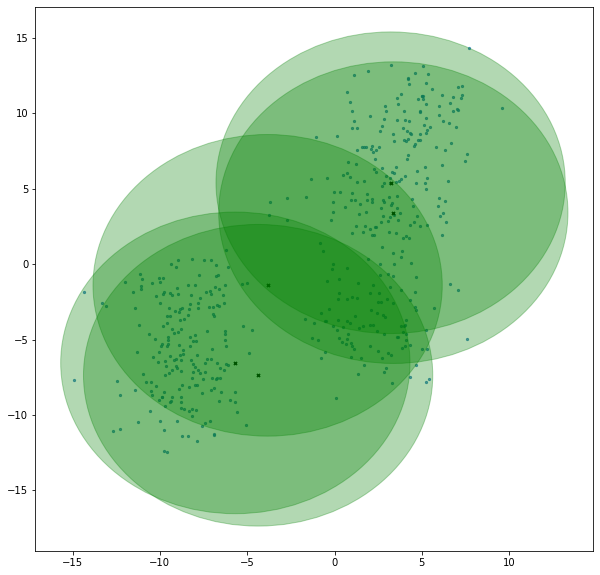

선택된 원의 갯수: 5



반지름 길이: 11인 원 생성, 선택된 점 들
[[-3.8297750856743855, -1.4060796338623591], [2.329767113830261, 2.4811811345461683], [-4.742216622359665, -4.393417411837817], [3.144471806755728, 4.457733107278189]]


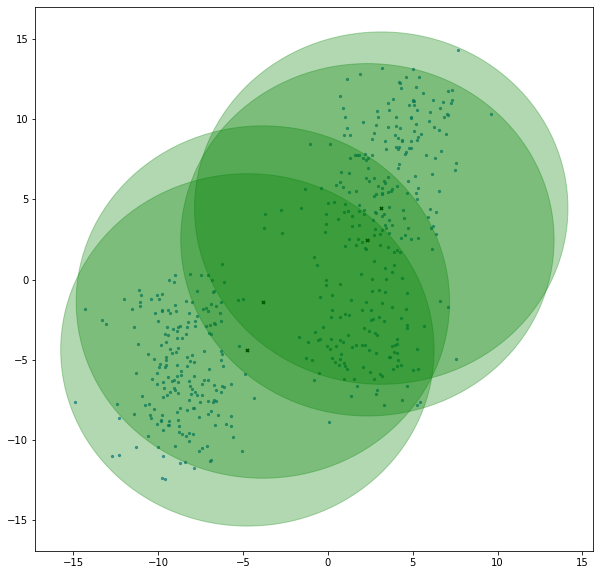

선택된 원의 갯수: 4



반지름 길이: 12인 원 생성, 선택된 점 들
[[-0.6651111081018426, 0.8972789237042917], [-6.26848691368119, -1.3793438085686636], [1.167990628657667, 4.27300824406134]]


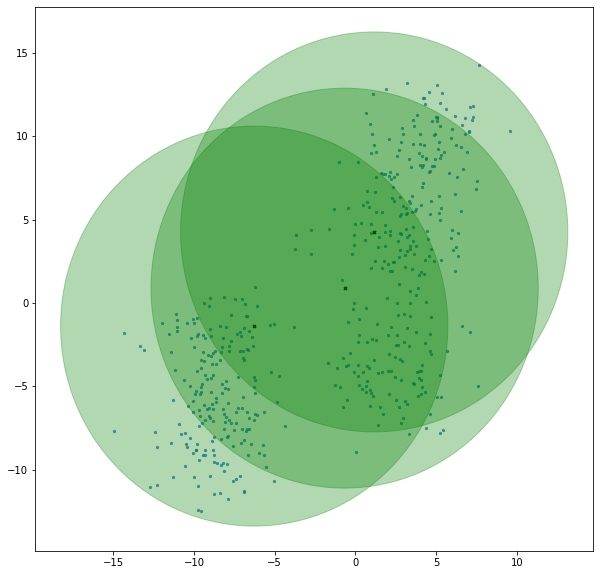

선택된 원의 갯수: 3



반지름 길이: 13인 원 생성, 선택된 점 들
[[-0.1150681407415392, -0.345039110058003], [-5.024548921675733, -1.237577313531451], [-0.084620104418859, 4.101145718078247]]


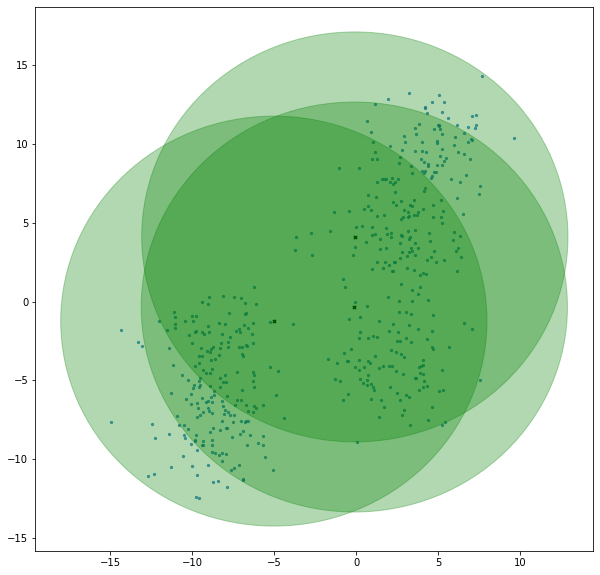

선택된 원의 갯수: 3



반지름 길이: 14인 원 생성, 선택된 점 들
[[-0.6651111081018426, 0.8972789237042917], [-3.8297750856743855, -1.4060796338623591], [-0.1992083041968242, 2.9539362973503978]]


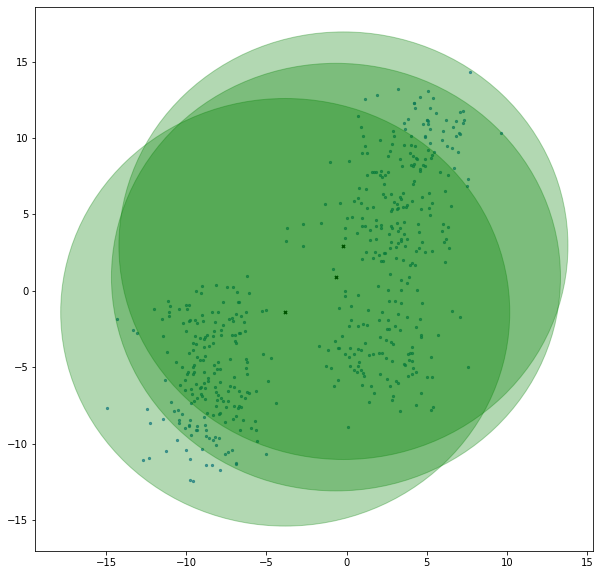

선택된 원의 갯수: 3





In [21]:
for radius in range(3,15):
    totalCircle = makeTotalCircle(radius)
    totalSelectedPoint = processing(totalCircle)
    print ("반지름 길이: {radius}인 원 생성, 선택된 점 들".format(radius=radius))
    print(totalSelectedPoint)

    scatter_circles(totalSelectedPoint, radius)
    print("선택된 원의 갯수: {num}".format(num=len(totalSelectedPoint)))
    print("\n\n")